In [85]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [86]:
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
sub_df=pd.read_csv("SampleSubmission.csv")
descp=pd.read_csv("VariableDefinitions.csv")

In [87]:
descp

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [88]:
train_df.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0


In [89]:
sub_df.head(3)

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0


In [90]:
print("Size of train",train_df.shape)
print("Size of test",test_df.shape)

Size of train (4809, 23)
Size of test (1601, 22)


In [91]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


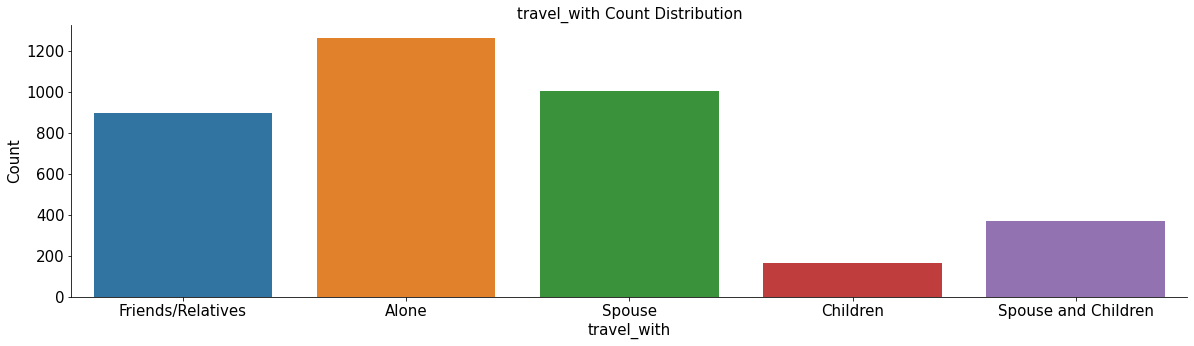

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'travel_with', data = train_df)
ax.set_xlabel('travel_with', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('travel_with Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

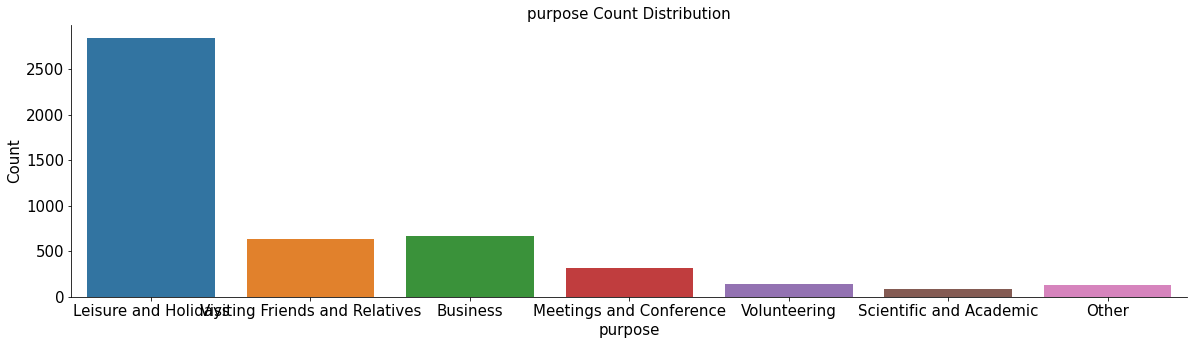

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'purpose', data = train_df)
ax.set_xlabel('purpose', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('purpose Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [94]:
#relationship between two categorical variables using a Two-way table
pd.crosstab(train_df['purpose'], train_df['travel_with'], margins=True)

travel_with,Alone,Children,Friends/Relatives,Spouse,Spouse and Children,All
purpose,,,,,,
Business,335,4,93,23,2,457
Leisure and Holidays,507,97,592,899,321,2416
Meetings and Conference,97,4,57,9,6,173
Other,68,4,25,6,1,104
Scientific and Academic,24,0,17,2,0,43
Visiting Friends and Relatives,184,52,87,61,38,422
Volunteering,50,1,24,5,0,80
All,1265,162,895,1005,368,3695


In [95]:
#relationship between two categorical variables using a Two-way table
pd.crosstab(train_df['main_activity'], train_df['country'], margins=True)

country,ALGERIA,ANGOLA,ARGENTINA,AUSTRALIA,AUSTRIA,BELGIUM,BERMUDA,BRAZIL,BURGARIA,BURUNDI,CANADA,CAPE VERDE,CHILE,CHINA,COLOMBIA,COMORO,CONGO,COSTARICA,CROATIA,CYPRUS,CZECH REPUBLIC,DENMARK,DJIBOUT,DOMINICA,DRC,EGYPT,ESTONIA,ETHIOPIA,FINLAND,FRANCE,GEORGIA,GERMANY,GHANA,GREECE,HUNGARY,INDIA,INDONESIA,IRAN,IRAQ,IRELAND,ISRAEL,ITALY,IVORY COAST,JAPAN,KENYA,KOREA,KUWAIT,LATVIA,LEBANON,LESOTHO,LITHUANIA,LUXEMBOURG,MADAGASCAR,MALAWI,MALAYSIA,MALT,MAURITIUS,MEXICO,MONTENEGRO,MORROCO,MOZAMBIQUE,MYANMAR,NAMIBIA,NEPAL,NETHERLANDS,NEW ZEALAND,NIGER,NIGERIA,NORWAY,OMAN,PAKISTAN,PHILIPINES,POLAND,PORTUGAL,QATAR,ROMANIA,RUSSIA,RWANDA,SCOTLAND,SERBIA,SINGAPORE,SLOVAKIA,SLOVENIA,SOUTH AFRICA,SPAIN,SRI LANKA,SUDAN,SWAZILAND,SWEDEN,SWIZERLAND,TAIWAN,THAILAND,TRINIDAD TOBACCO,TUNISIA,TURKEY,UAE,UGANDA,UKRAIN,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES OF AMERICA,URUGUAY,YEMEN,ZAMBIA,ZIMBABWE,All
main_activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Beach tourism,1,0,0,15,3,7,0,1,1,9,24,0,0,19,1,1,0,0,1,0,0,10,0,0,5,2,0,1,2,55,1,59,0,2,0,16,1,1,0,5,3,210,0,2,42,2,1,0,1,0,0,1,0,6,1,1,0,0,1,0,2,0,1,1,8,1,1,0,4,9,2,0,7,1,1,2,5,14,0,6,1,0,1,78,38,0,2,1,12,9,0,0,0,1,1,11,34,1,1,94,64,1,1,19,76,1025
Bird watching,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,3,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,1,1,3,0,0,6,4,37
Conference tourism,0,0,0,23,4,1,0,1,0,0,15,0,0,1,0,0,0,0,1,0,5,6,0,0,0,3,0,0,0,25,0,18,0,0,0,1,0,0,0,2,1,5,0,6,3,3,0,1,0,0,1,0,0,1,16,0,0,0,0,0,0,0,0,0,3,5,0,0,3,0,0,0,3,0,0,0,1,1,0,0,3,0,0,2,7,0,0,0,4,4,0,0,0,0,1,1,0,0,3,99,83,0,0,1,0,367
Cultural tourism,0,1,0,9,2,7,1,1,0,22,8,0,0,1,0,0,2,0,0,0,3,5,1,0,10,0,1,0,2,19,0,25,0,2,0,3,0,0,0,2,2,32,0,7,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,1,5,6,0,0,1,1,0,0,0,8,1,0,0,0,0,11,10,0,1,0,3,3,0,0,0,0,1,4,18,0,1,46,42,0,0,4,6,359
Diving and Sport Fishing,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,13
Hunting tourism,0,0,0,4,0,4,0,0,1,16,3,0,0,2,0,0,5,0,0,0,0,3,0,0,4,0,0,0,0,7,0,8,0,2,0,7,0,0,0,1,0,9,1,17,62,1,0,0,0,1,0,0,1,9,2,0,0,0,0,0,1,0,1,0,1,0,0,0,3,12,1,0,0,0,2,0,0,6,1,0,0,0,0,20,5,0,1,0,3,3,0,1,0,0,0,5,43,1,1,43,23,0,1,45,64,457
Mountain climbing,0,0,0,0,1,2,0,1,0,4,3,1,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,5,0,2,0,3,1,0,0,19,1,0,1,0,0,2,0,3,39,0,0,0,2,0,0,0,0,3,0,0,1,0,0,0,4,0,0,1,1,0,0,0,1,2,1,0,0,1,0,0,0,7,0,0,0,0,0,29,1,0,0,0,2,2,0,1,0,0,0,3,14,0,0,11,21,0,0,14,18,234
Wildlife tourism,1,0,1,131,7,27,0,6,0,13,61,0,2,39,2,0,3,1,0,0,3,17,1,1,11,4,0,0,4,165,0,103,1,1,2,36,1,1,0,19,9,122,0,18,72,6,1,1,0,0,3,1,0,1,3,1,1,2,0,1,1,1,0,0,91,12,0,3,5,4,2,2,4,6,4,0,2,3,2,0,3,2,0,81,103,3,0,2,13,41,9,0,1,0,0,8,48,0,6,230,456,0,0,100,105,2259
business,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,4,0,0,0,2,0,0,0,0,1,11,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,8,0,0,0,1,1,58


In [96]:
data=train_df.copy()
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [97]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [98]:
data['travel_with'] = pd.get_dummies(data['travel_with'])
data['travel_with'].head(3)

0    0
1    0
2    1
Name: travel_with, dtype: uint8

In [99]:
data['most_impressing'] = pd.get_dummies(data['most_impressing'])
data['most_impressing'].head(3)

0    0
1    0
2    0
Name: most_impressing, dtype: uint8

In [100]:
data.travel_with.fillna(data.travel_with.mean(),inplace = True)
data.most_impressing.fillna(data.most_impressing.mean(),inplace = True)
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)
data.total_cost.fillna(data.total_cost.mean(), inplace=True)

In [101]:
data.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [102]:
test_df.isna().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [103]:
test_df.travel_with.fillna(data.travel_with.mean(),inplace = True)
test_df.most_impressing.fillna(data.most_impressing.mean(),inplace = True)
test_df.total_female.fillna(data.total_female.mean(),inplace = True)
test_df.total_male.fillna(data.total_male.mean(),inplace = True)

In [104]:
test_df.isna().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64

In [105]:
 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])

In [106]:
columns_to_transform = ['tour_arrangement','purpose','main_activity','info_source','payment_mode']
data = pd.get_dummies( data,columns = columns_to_transform,drop_first=True)

In [107]:
data.head(2)

,ID,country,age_group,travel_with,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,most_impressing,total_cost,tour_arrangement_Package Tour,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,89,2,0,1.0,1.0,0,0,0,0,0,0,0,13.0,0.0,0,0,674602.5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,tour_10,99,1,0,1.0,0.0,0,0,0,0,0,0,0,14.0,7.0,1,0,3214906.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [108]:

le = LabelEncoder()
test_df['age_group'] = le.fit_transform(test_df['age_group'])
test_df['package_transport_int'] = le.fit_transform(test_df['package_transport_int'])
test_df['package_accomodation'] = le.fit_transform(test_df['package_accomodation'])
test_df['package_food'] = le.fit_transform(test_df['package_food'])
test_df['package_transport_tz'] = le.fit_transform(test_df['package_transport_tz'])
test_df['package_sightseeing'] = le.fit_transform(test_df['package_sightseeing'])
test_df['package_guided_tour'] = le.fit_transform(test_df['package_guided_tour'])
test_df['package_insurance'] = le.fit_transform(test_df['package_insurance'])
test_df['first_trip_tz'] = le.fit_transform(test_df['first_trip_tz'])
test_df['country'] = le.fit_transform(test_df['country'])

In [109]:
columns_to_transform = ['tour_arrangement','purpose','main_activity','info_source','payment_mode']
test_df = pd.get_dummies( test_df,columns = columns_to_transform,drop_first=True)

In [110]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

In [111]:
#feature engineering
data["total_persons"] = data["total_female"] + data["total_male"]

data["total_nights_spent"] = data["night_mainland"] + data["night_zanzibar"]


In [112]:
## convert float dtypes to int
test_df["total_female"] = test_df['total_female'].astype('int')
test_df["total_male"] = test_df['total_male'].astype('int')
test_df["night_mainland"] = test_df['night_mainland'].astype('int')
test_df["night_zanzibar"] = test_df['night_zanzibar'].astype('int')

In [113]:
#feature engineering
test_df["total_persons"] = test_df["total_female"] + test_df["total_male"]

test_df["total_nights_spent"] = test_df["night_mainland"] + test_df["night_zanzibar"]


In [114]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, test_size = 0.25, random_state=0)


In [115]:
'''## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)'''

'## separate data into train and test\ntrain_df=data[data.total_cost.notnull()].reset_index(drop=True)\ntest_df=data[data.total_cost.isna()].reset_index(drop=True)'

In [127]:
train_df.reset_index(drop=True)
test_df.reset_index(drop=True)

,ID,country,age_group,travel_with,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,most_impressing,total_cost,tour_arrangement_Package Tour,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,total_persons,total_nights_spent
0,tour_2018,83,1,0,0,1,0,1,1,1,1,1,0,4,0,0,0,530400.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4
1,tour_3076,41,2,0,1,1,1,1,1,1,0,0,0,0,12,1,0,13842913.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,12
2,tour_601,31,1,0,2,1,0,0,0,0,0,0,0,12,3,1,0,1259900.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3,15
3,tour_5285,89,1,0,1,1,1,1,1,1,1,1,0,10,7,1,1,22376250.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,17
4,tour_5310,104,2,1,0,1,0,0,0,0,0,0,0,3,0,0,0,411600.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,tour_5911,39,1,1,0,1,1,1,1,1,1,1,0,4,0,1,1,5469750.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4
1199,tour_833,13,2,0,1,5,1,1,0,0,0,0,0,10,0,1,0,8619000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,6,10
1200,tour_4765,100,3,0,1,1,0,1,1,1,1,0,0,21,0,1,1,8453250.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,21
1201,tour_2674,3,0,1,0,1,0,1,1,0,1,1,0,12,0,1,1,4060875.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12


In [128]:
print(train_df.shape)
print(test_df.shape)

(3606, 45)
(1203, 45)


In [129]:
#Modelling
feat_cols = train_df.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train_df["total_cost"]


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [131]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_df[cols],target, test_size=0.15, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3065, 43) (3065,)
(541, 43) (541,)


In [132]:
from xgboost import XGBRegressor
xgb=XGBRegressor( n_estimators= 110,learning_rate = 0.01,max_depth =5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


[06:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [133]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print('Error {}'.format(mae))

Error 4942102.963402958


In [135]:
#predict and prepare submission file
sub = test_df[cols]
predictions_xgb  = xgb.predict(sub)
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': predictions_xgb})
submission_df.to_csv('submit.csv',index=False)